In [25]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [26]:
mnist_train = datasets.MNIST(root = "./dataset", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root = "./dataset", train=False, transform=transforms.ToTensor(), download=True)

In [46]:
device = "cuda" if torch.cuda.is_available() else "cpu"
e = 0

F = nn.Sequential(
    nn.Linear(28*28, 128, device = device),
    nn.ReLU(),
    nn.Linear(128,64, device = device),
    nn.ReLU(),
    nn.Linear(64,10, device = device),
    nn.ReLU()
)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(F.parameters(), lr = 0.1)

while(True) :
    e += 1
    batch_size = 100
    batch = numpy.random.randint(0,len(mnist_train),(batch_size))
    x = []
    t = []
    for b in batch :
        x.append(mnist_train[b][0].reshape(28*28).tolist())
        t.append(mnist_train[b][1])
    x = torch.tensor(x, dtype=torch.float, device = device)
    t = torch.tensor(t, dtype=torch.long, device = device)

    y = F(x)
    loss = loss_function(y, t)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if loss < 0.3 :
        print("epoch {} | loss {} - train end".format(e, loss))
        break
    if e == 1000 :
        print("epoch {} | loss {} - too much train".format(e, loss))
        break        
    if e % 100 == 0 :
        print("epoch {} | loss {}".format(e, loss))

epoch 100 | loss 1.8195799589157104
epoch 200 | loss 0.9928643703460693
epoch 300 | loss 0.9018739461898804
epoch 400 | loss 0.848706841468811
epoch 500 | loss 0.6281848549842834
epoch 600 | loss 0.573269784450531
epoch 700 | loss 0.8001048564910889
epoch 800 | loss 0.6838788390159607
epoch 900 | loss 0.6144910454750061
epoch 1000 | loss 0.6349425911903381 - too much train


In [47]:
cnt = 0;
for i in range(len(mnist_test)) :
    x = mnist_test[i][0].reshape(28*28).to(device)
    t = mnist_test[i][1]
    y = F(x)
    if torch.argmax(y) == t :
        cnt = cnt + 1

print("correct_posibility : %f" %(cnt / len(mnist_test)))
torch.save(F,"MNIST2.pt")

correct_posibility : 0.747200


tensor(1)


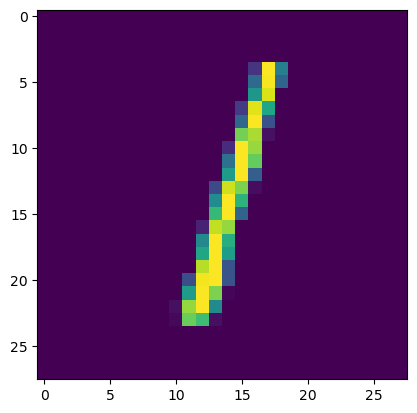

In [6]:
#F = torch.load("MNIST.pt", weights_only = False)

img = mnist_test[2][0].reshape(28,28)
plt.imshow(img)

y_array = F(img.reshape(1,28*28))
print(torch.argmax( y_array))